# 0.0 IMPORTS


In [71]:
import numpy      as np
from   sklearn    import datasets as ds
from   matplotlib import pyplot   as plt
from   sklearn    import cluster  as ct, metrics as mt
import matplotlib.cm              as cm

# 1.0 LOADING DATASET

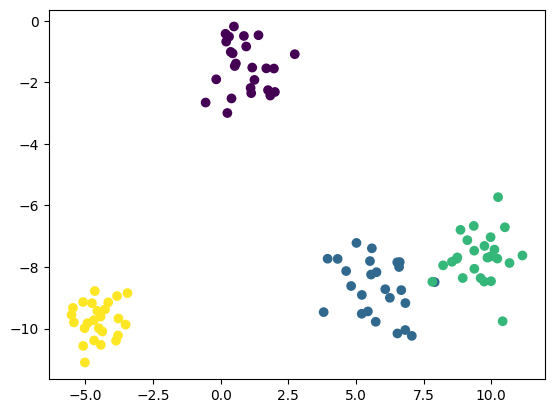

In [112]:
X, y = ds.make_blobs(n_samples=100,
                     n_features=10,
                     centers=4,
                     cluster_std=0.9,
                     random_state=0)
plt.scatter(X[:,0],X[:,4], c=y)

# 2.0 TRAINING MODEL

In [113]:
#define
k = 2
model = ct.KMeans(n_clusters=k, init='random', n_init=10, random_state=0)
# fit
labels = model.fit_predict(x,y)
#performance
mt.silhouette_score(x,labels)

0.6460859591755024

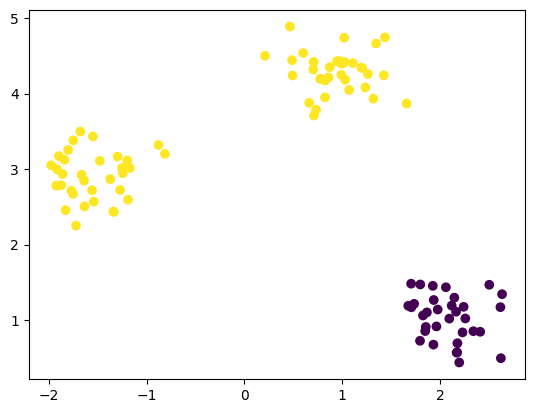

In [114]:
plt.scatter(x[:,0],x[:,1], c=labels)

# 3.0 FINE TUNING

In [115]:
clusters = np.arange(2, 11, 1)
ss_avg = []
for k in clusters:
    model = ct.KMeans(n_clusters=k, init='random', n_init=10, random_state=0)
    labels = model.fit_predict(x)
    ss_avg.append(mt.silhouette_score(x,labels))
    

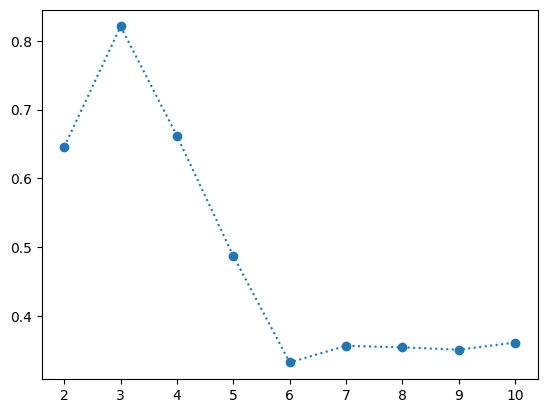

In [116]:
plt.plot(clusters,ss_avg,':o');

For n_clusters = 2 The average silhouette_score is : 0.5040477485877816
For n_clusters = 3 The average silhouette_score is : 0.643857431531547
For n_clusters = 4 The average silhouette_score is : 0.753122372722526
For n_clusters = 5 The average silhouette_score is : 0.5975100444973022
For n_clusters = 6 The average silhouette_score is : 0.429952385890326


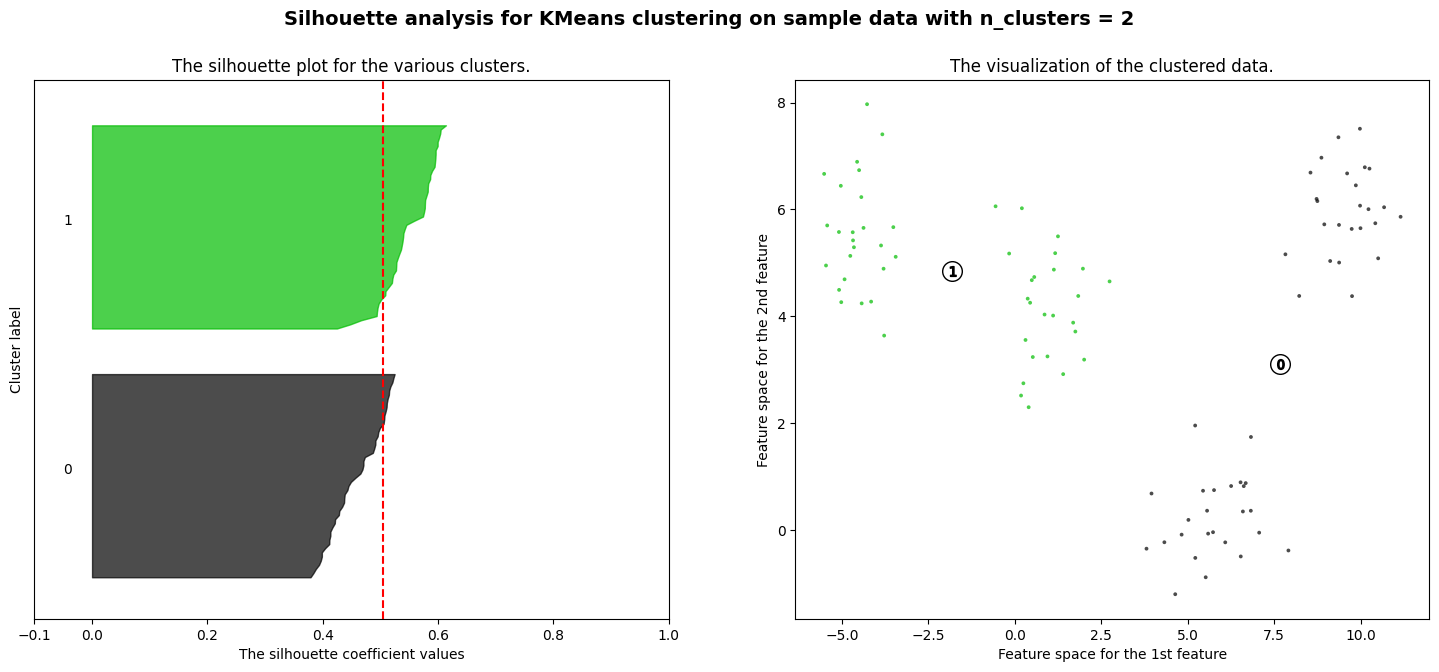

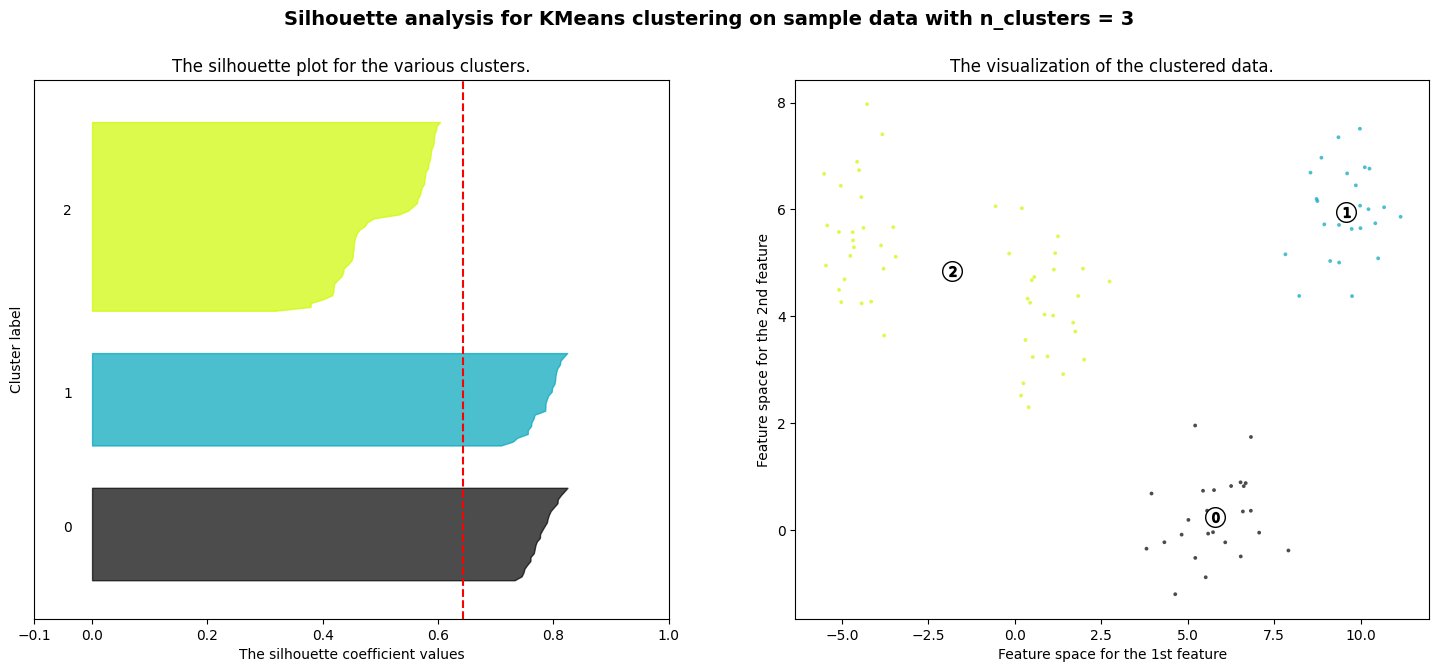

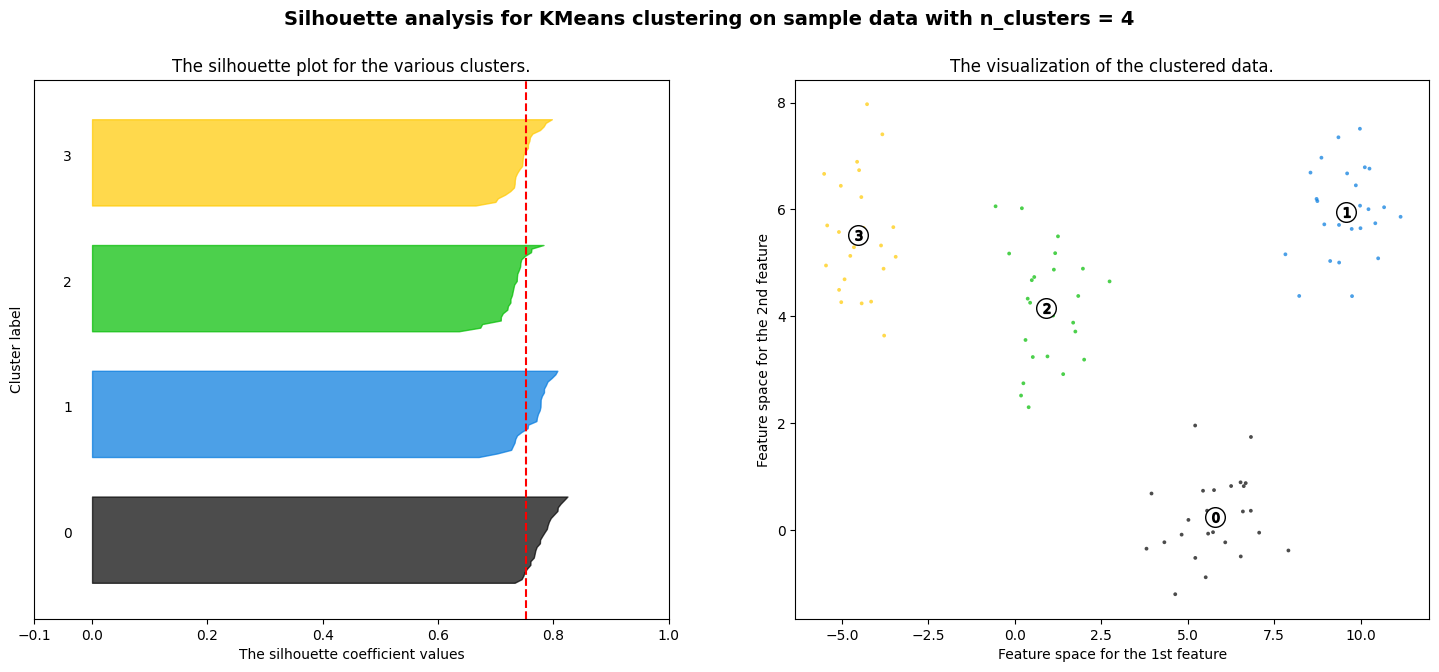

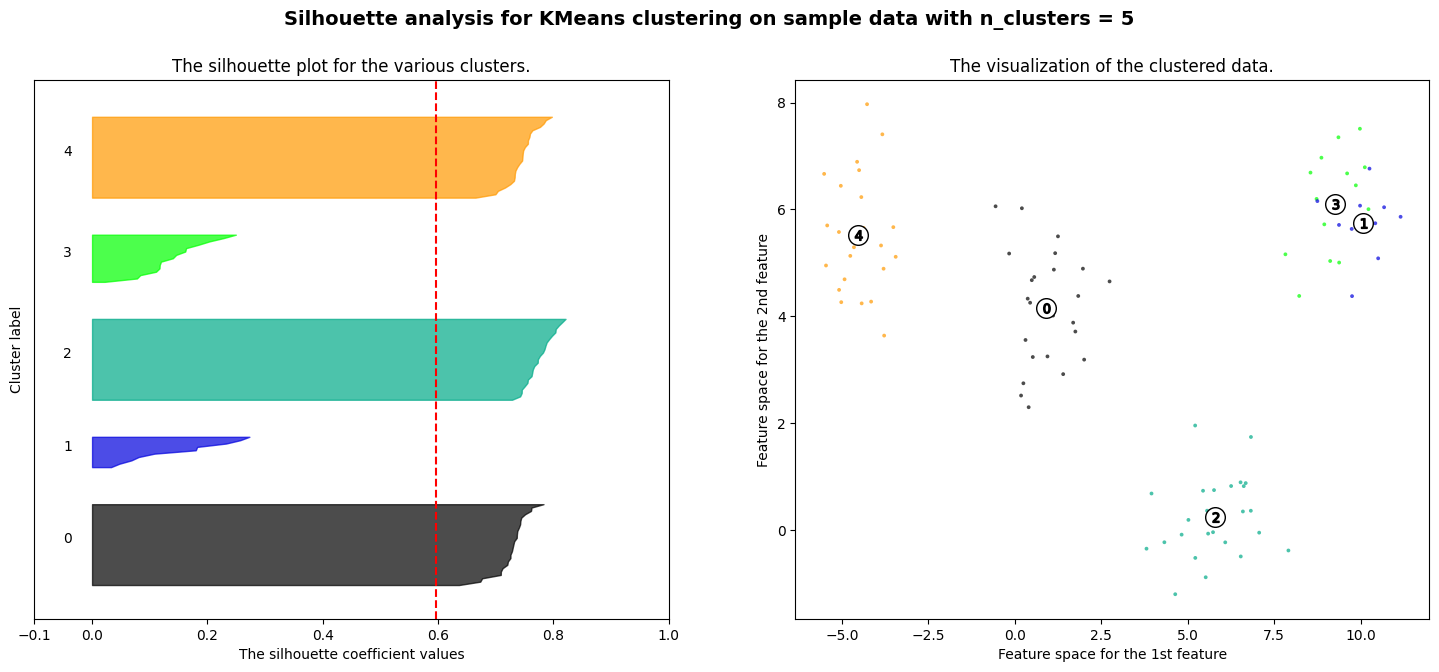

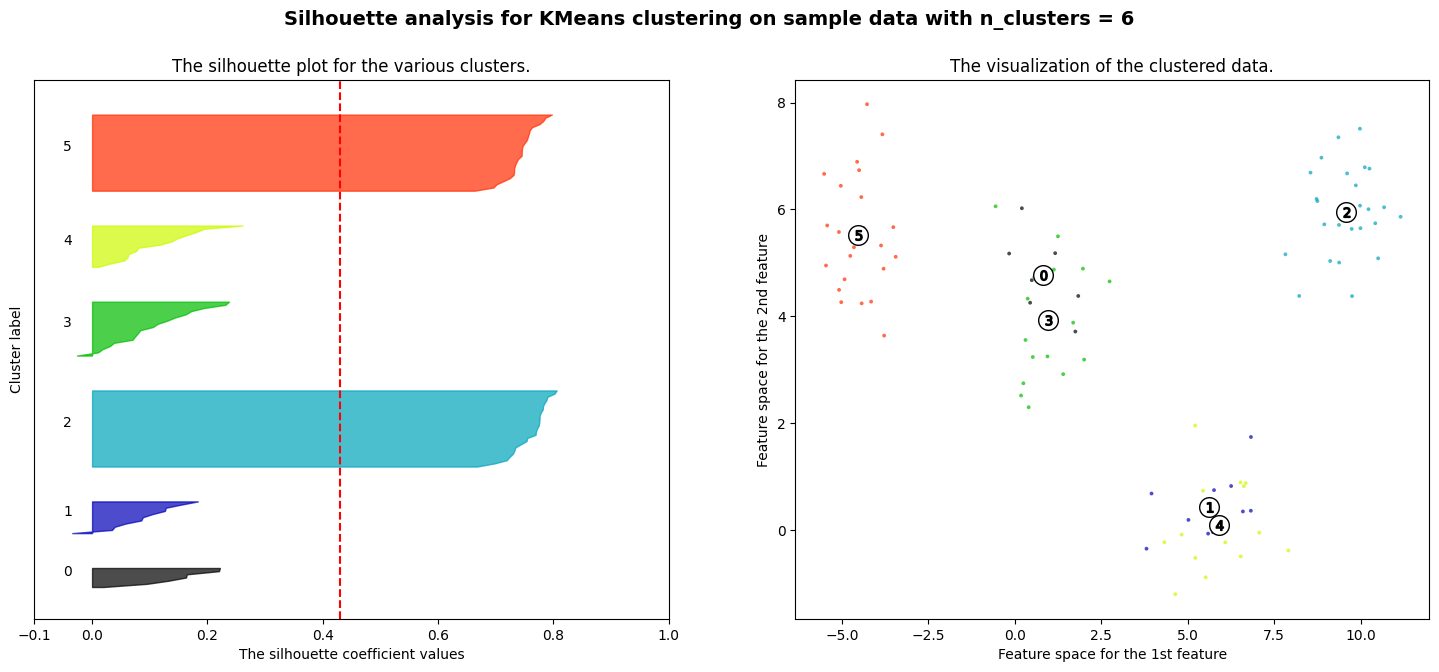

In [117]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = ct.KMeans(n_clusters=n_clusters, init = 'random', n_init="auto", random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = mt.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = mt.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# 4.0 NON-CIRCULAR DATASET

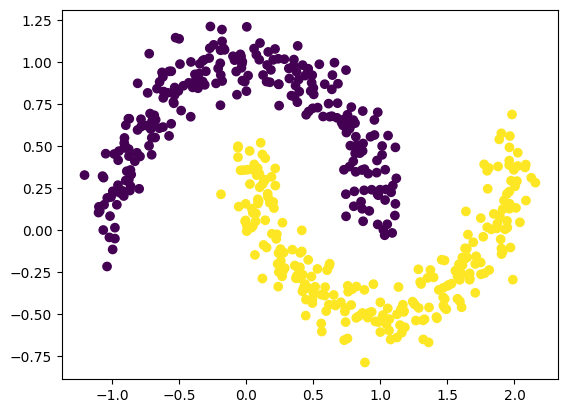

In [125]:
X,y = ds.make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0],X[:,1],c=y)

In [166]:
list_cluster = np.arange(2,15,1)
score_moon =[]
for k in list_cluster:
    moon = ct.KMeans(n_clusters = k, init='random', n_init=10, random_state=0 )
    score_moon.append(mt.silhouette_score(X,moon.fit_predict(X)))

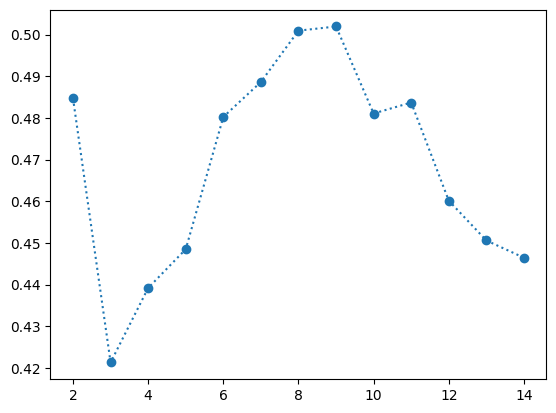

In [167]:
plt.plot(list_cluster,score_moon, ':o')

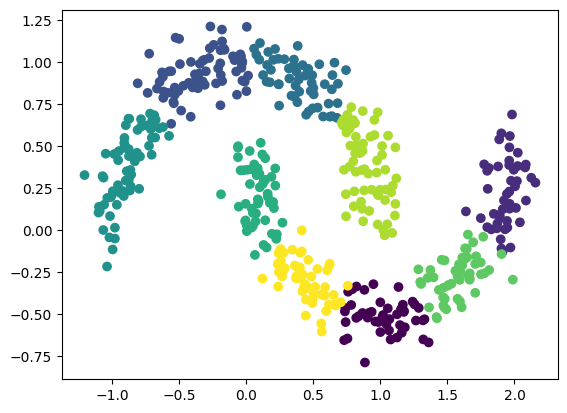

In [172]:
moon_final = ct.KMeans(n_clusters = 9, init='random', n_init=10, random_state=0)
labels = moon_final.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = labels)

For n_clusters = 2 The average silhouette_score is : 0.48469179120988654
For n_clusters = 3 The average silhouette_score is : 0.42130335018292764
For n_clusters = 4 The average silhouette_score is : 0.4391852137130519
For n_clusters = 5 The average silhouette_score is : 0.44848918210355637
For n_clusters = 6 The average silhouette_score is : 0.48023091552141534
For n_clusters = 7 The average silhouette_score is : 0.4886244050902935
For n_clusters = 8 The average silhouette_score is : 0.5009363210092541
For n_clusters = 9 The average silhouette_score is : 0.5019437532571585
For n_clusters = 10 The average silhouette_score is : 0.48105607081647817
For n_clusters = 11 The average silhouette_score is : 0.4836941983861097
For n_clusters = 12 The average silhouette_score is : 0.4601359045940603
For n_clusters = 13 The average silhouette_score is : 0.4505832705215704
For n_clusters = 14 The average silhouette_score is : 0.44644748122040634


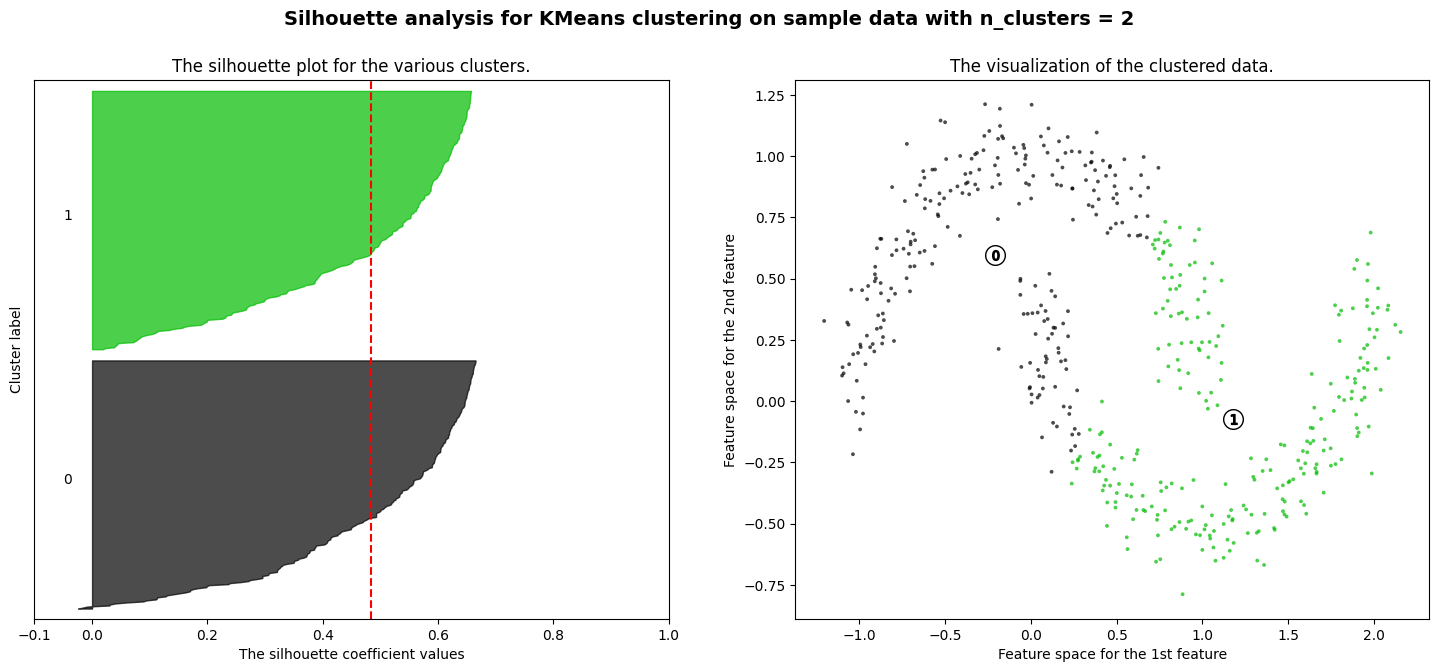

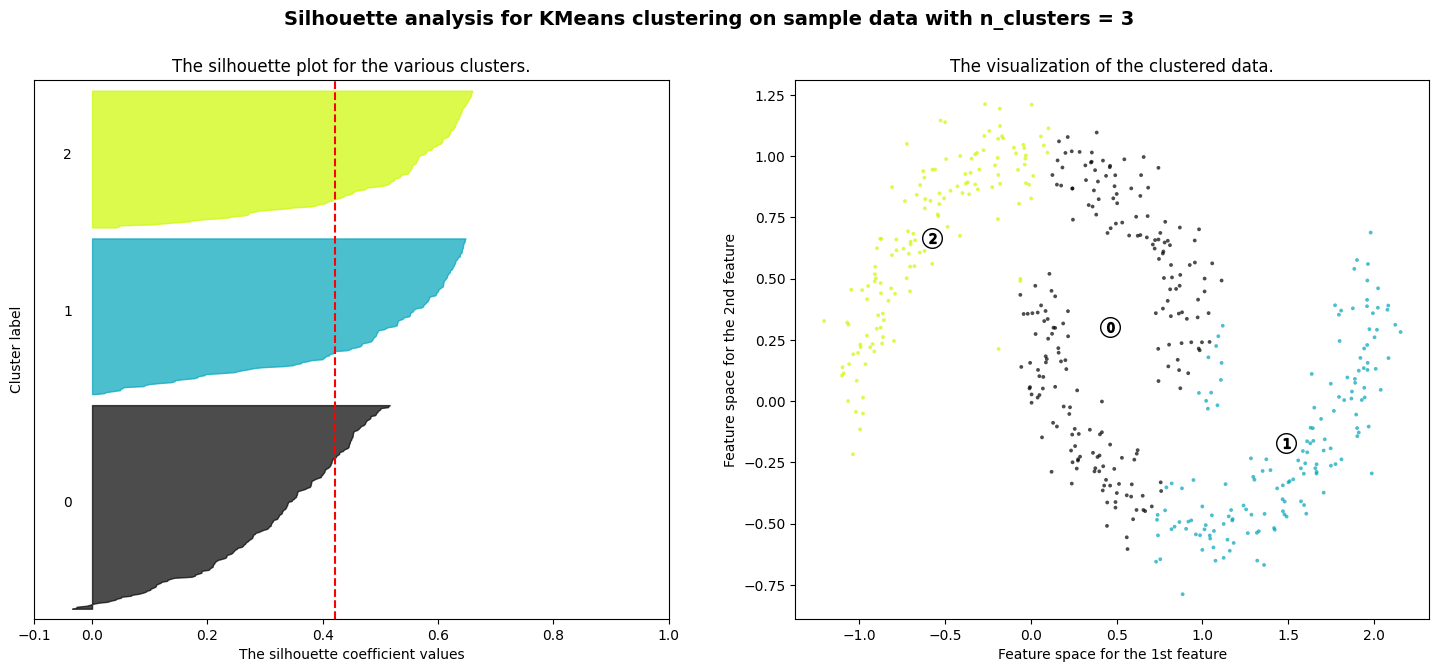

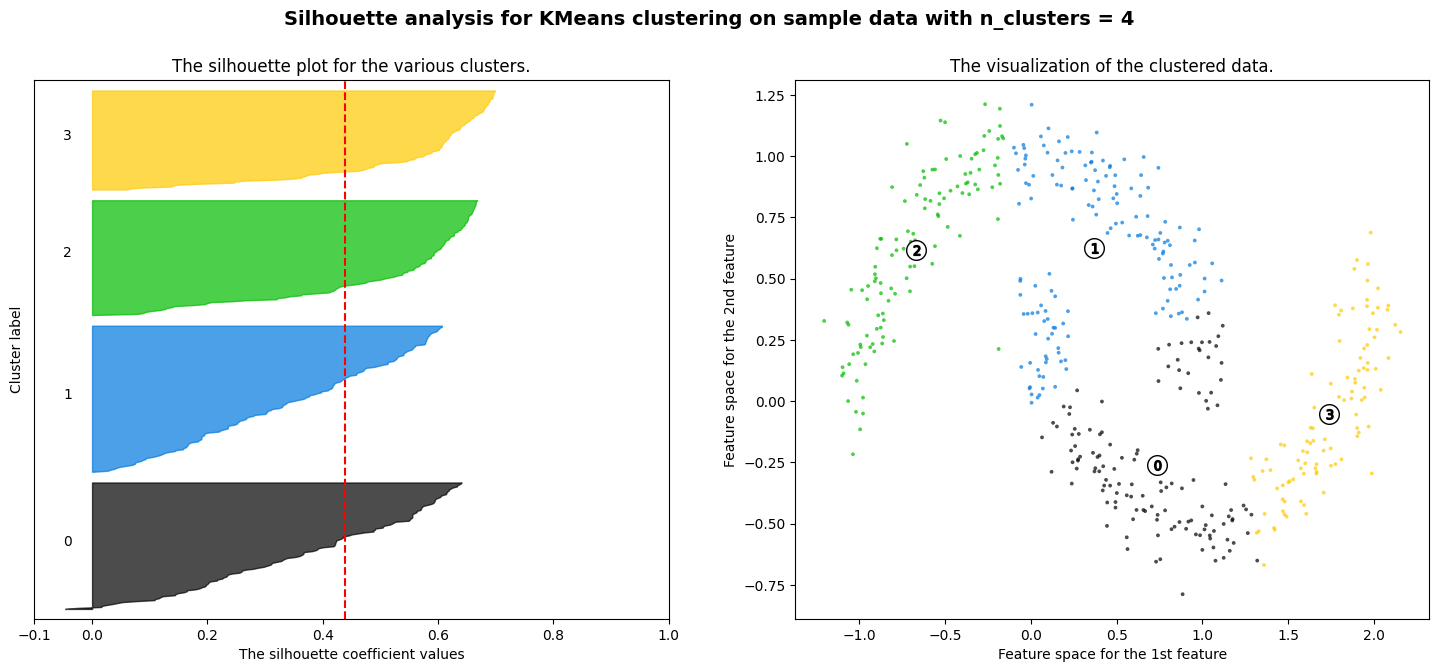

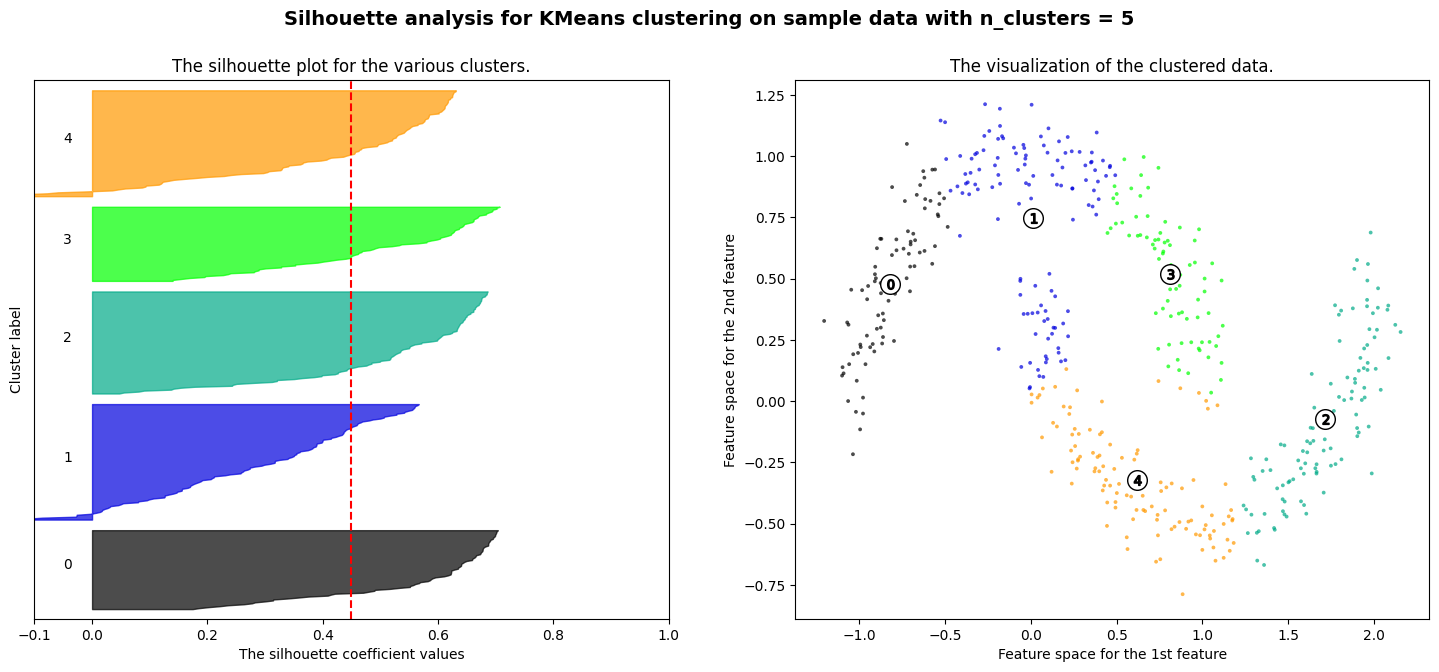

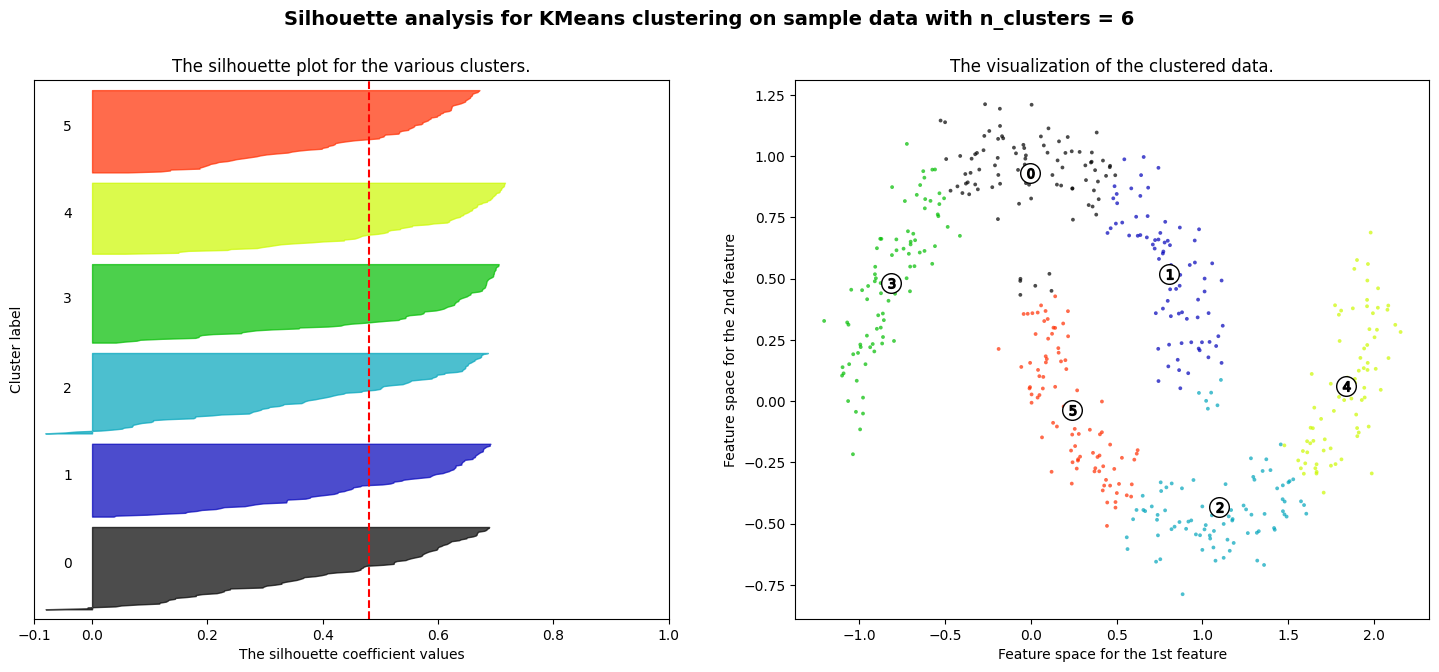

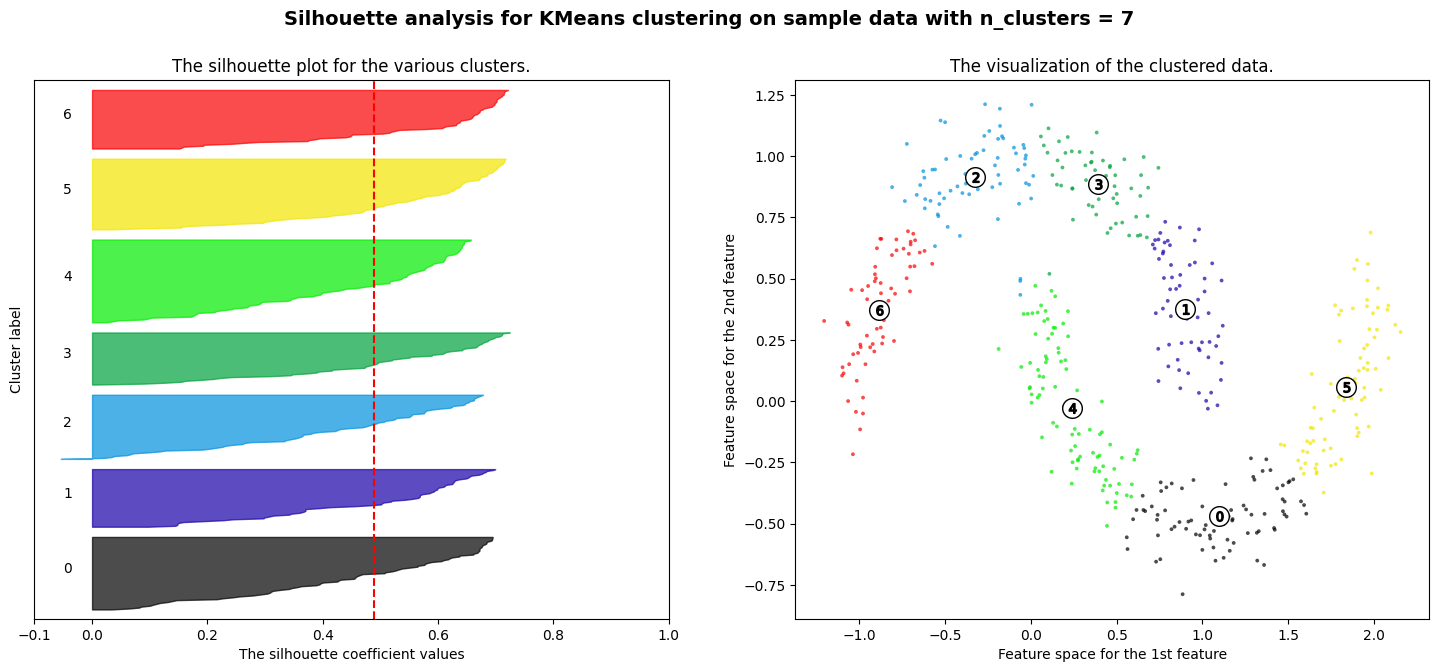

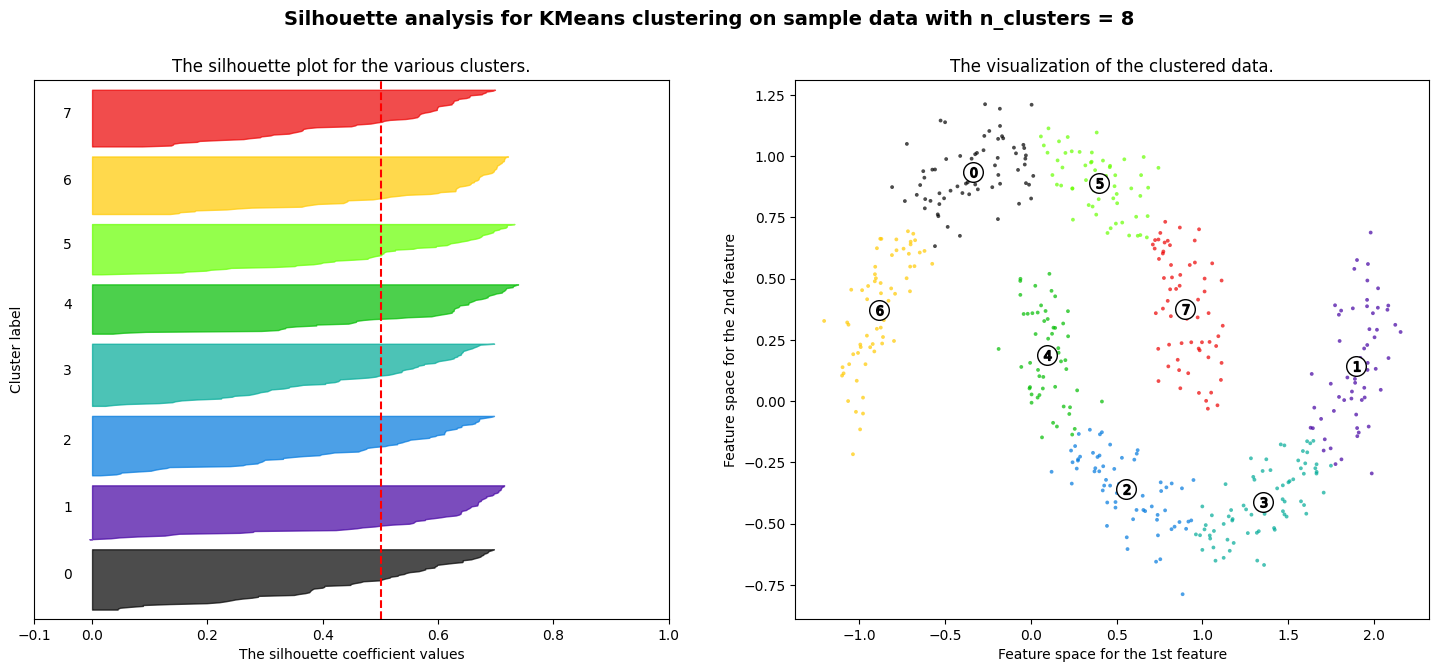

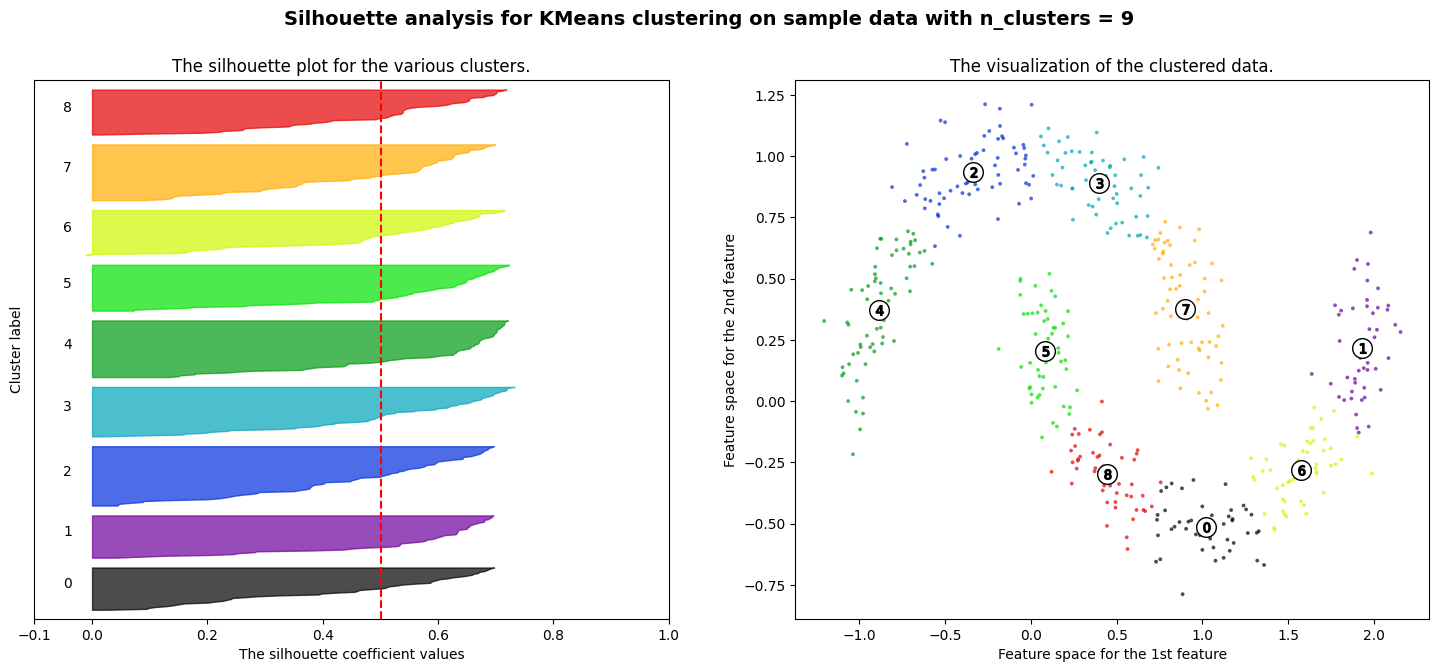

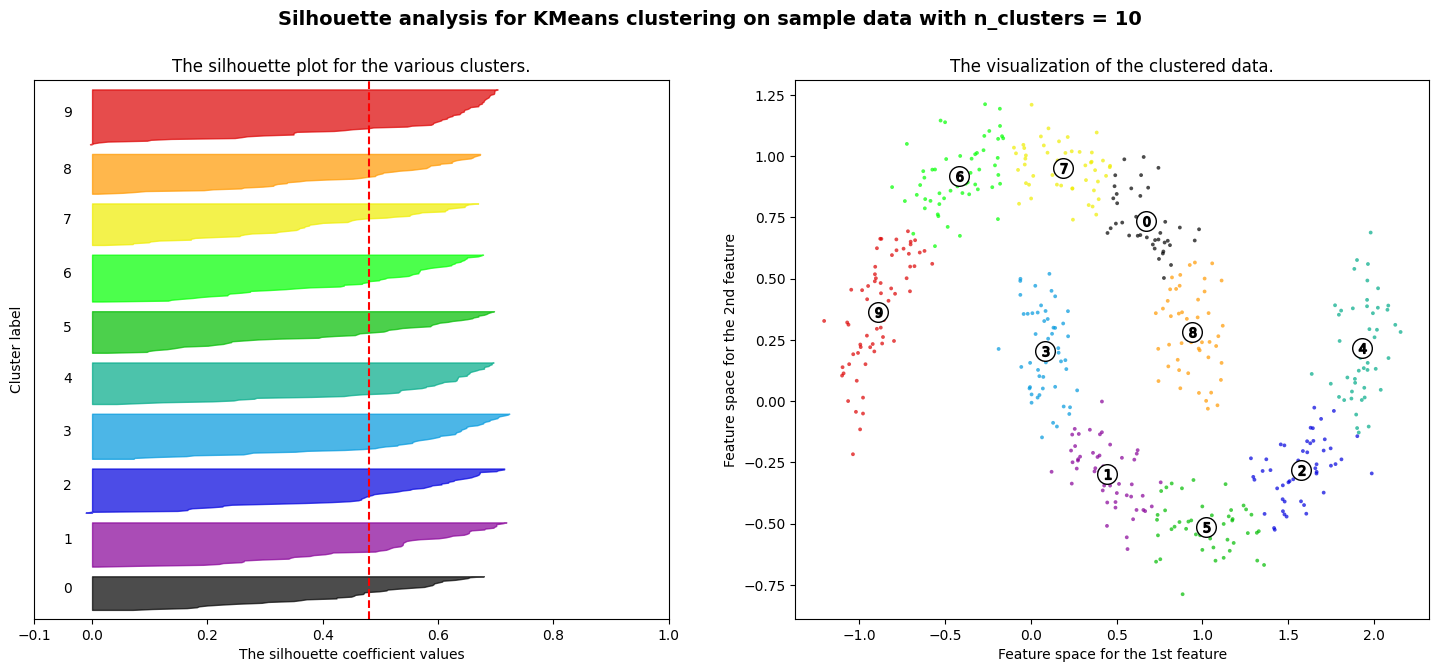

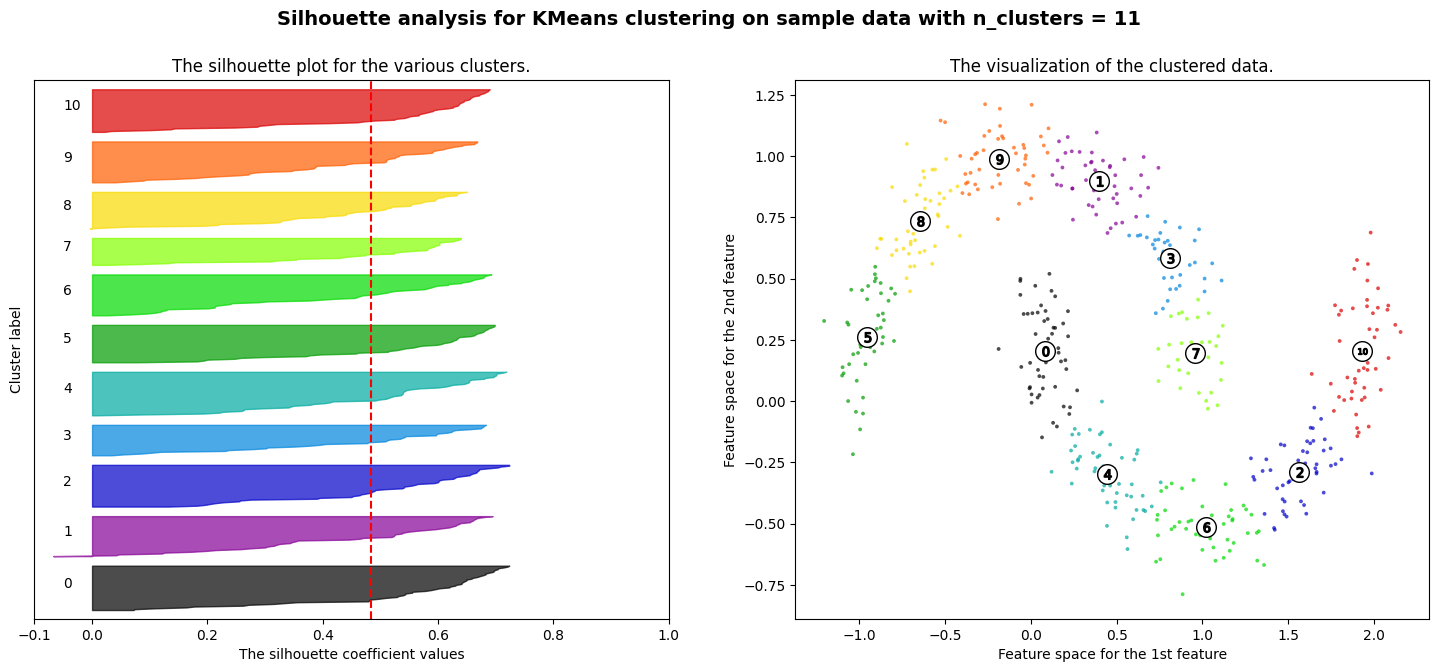

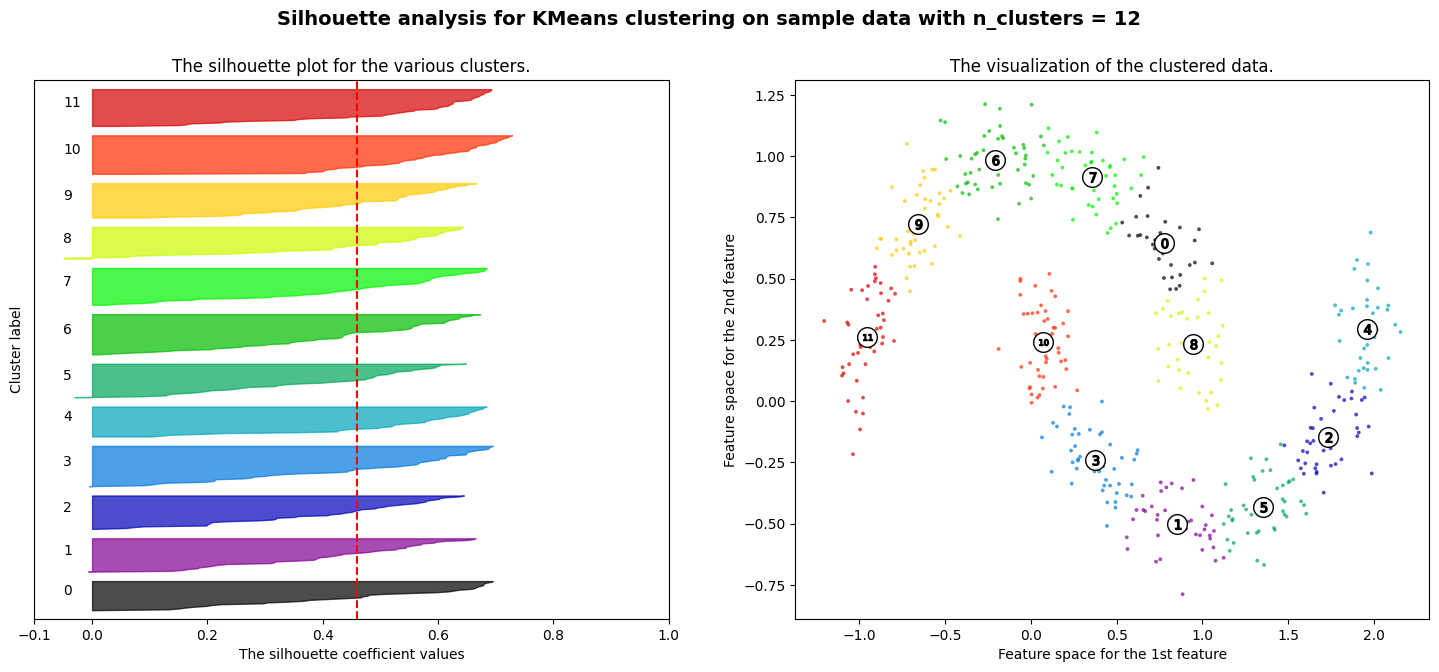

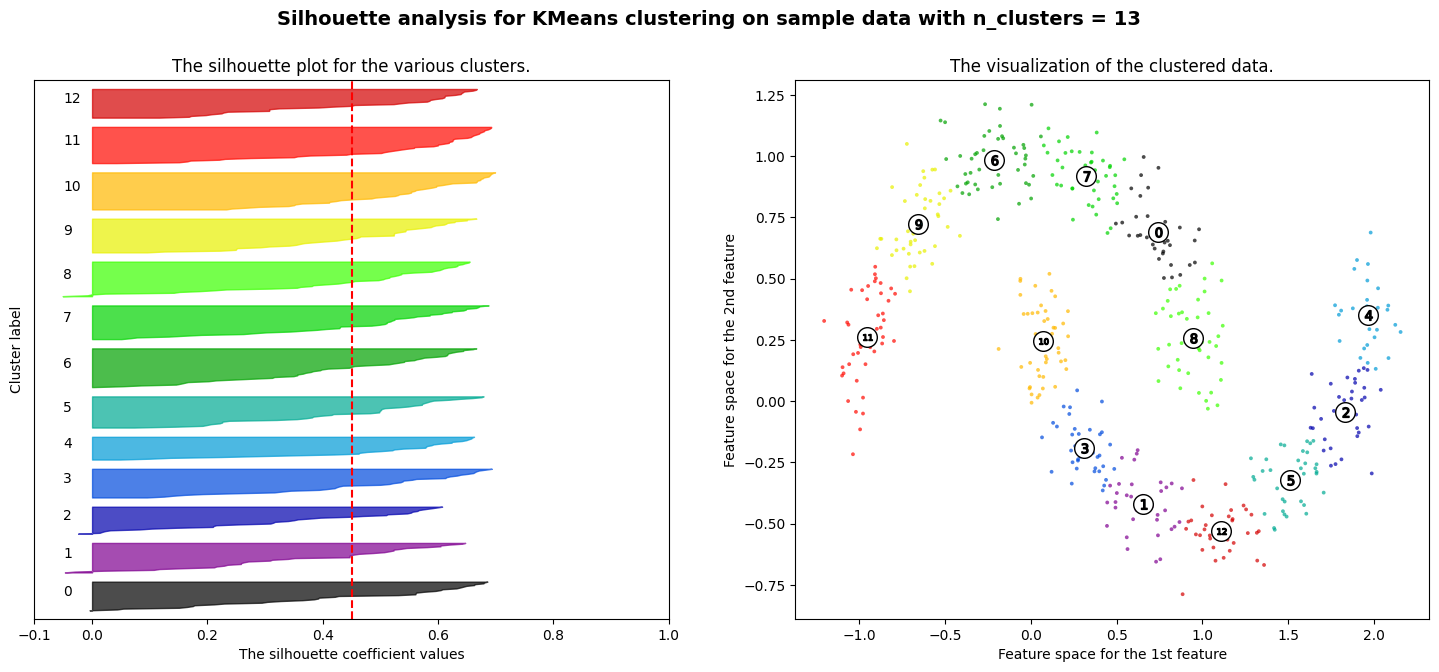

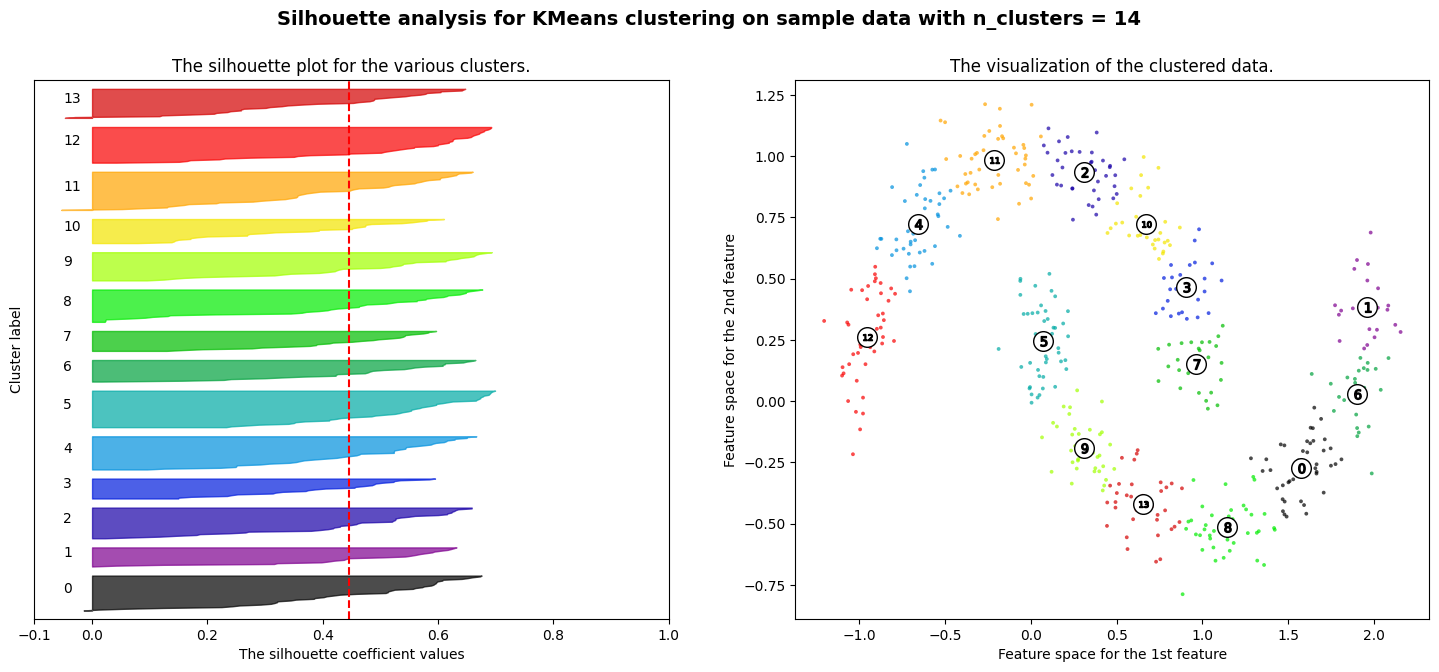

In [174]:
range_n_clusters = list_cluster

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = ct.KMeans(n_clusters=n_clusters, init = 'random', n_init="auto", random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = mt.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = mt.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()